In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_plot(xs, ys, color, label, xlabel, ylabel):
    plt.plot(xs, ys, color, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='best')

In [3]:
nu = 1
tau = 1
tau_s = 1
u_spike = 1

In [4]:
def eps(s, d_ij):
    return (s - d_ij) / tau_s * np.exp(-(s - d_ij) / tau_s) * (1 if s - d_ij > 0 else 0)


def eta(s):
    return -nu * np.exp(-s / tau) * (1 if s > 0 else 0)

In [5]:
class SNN:
    def __init__(self, input_neurons, hidden_neurons_1, hidden_neurons_2, output_neurons, max_synapses, max_delay):
        self.input_neurons = input_neurons
        self.hidden_neurons_1 = hidden_neurons_1
        self.hidden_neurons_2 = hidden_neurons_2
        self.output_neurons = output_neurons

        self.synapses_cnt1 = np.random.randint(low=1, high=max_synapses, size=(input_neurons, hidden_neurons_1))
        self.synapses_cnt2 = np.random.randint(low=1, high=max_synapses, size=(hidden_neurons_1, hidden_neurons_2))
        self.synapses_cnt3 = np.random.randint(low=1, high=max_synapses, size=(hidden_neurons_2, output_neurons))

        self.d1 = np.random.randint(low=1, high=max_delay, size=(input_neurons, hidden_neurons_1))
        self.d2 = np.random.randint(low=1, high=max_delay, size=(hidden_neurons_1, hidden_neurons_2))
        self.d3 = np.random.randint(low=1, high=max_delay, size=(hidden_neurons_2, output_neurons))

        self.w1 = np.random.random((input_neurons, hidden_neurons_1))
        self.w2 = np.random.random((hidden_neurons_1, hidden_neurons_2))
        self.w3 = np.random.random((hidden_neurons_2, output_neurons))

        self.u1 = np.zeros((1000, hidden_neurons_1))
        self.u2 = np.zeros((1000, hidden_neurons_2))
        self.u3 = np.zeros((1000, output_neurons))

        self.prev_t_0 = np.zeros(input_neurons)
        self.prev_t_1 = np.zeros(hidden_neurons_1)
        self.prev_t_2 = np.zeros(hidden_neurons_2)
        self.prev_t_3 = np.zeros(output_neurons)

    def apply(self, input_layer, t):
        for i in range(self.input_neurons):
            if input_layer[i] == 1:
                self.prev_t_0[i] = t

        for i in range(self.hidden_neurons_1):
            self.u1[t, i] = eta(t - self.prev_t_1[i])
            for j in range(self.input_neurons):
                self.u1[t, i] += self.w1[j, i] * eps(t - self.prev_t_0[j] - self.d1[j, i], self.d1[j, i])
            if self.u1[t, i] > u_spike:
                self.prev_t_1[i] = t

        for i in range(self.hidden_neurons_2):
            self.u2[i] = eta(t - self.prev_t_2[i])
            for j in range(self.hidden_neurons_1):
                self.u2[t, i] += self.w2[j, i] * eps(t - self.prev_t_1[j] - self.d2[j, i], self.d2[j, i])
            if self.u2[t, i] > u_spike:
                self.prev_t_2[i] = t

        for i in range(self.output_neurons):
            self.u3[i] = eta(t - self.prev_t_3[i])
            for j in range(self.hidden_neurons_2):
                self.u3[t, i] += self.w3[j, i] * eps(t - self.prev_t_2[j] - self.d3[j, i], self.d3[j, i])
            if self.u3[t, i] > u_spike:
                self.prev_t_3[i] = t

    def visualize_u(self, maxT, text=""):
        tim = np.arange(maxT)        
        for i in range(self.output_neurons):
            make_plot(tim, self.u3[:maxT, i], 'g', 'u(t)', 'time', 'u')
            plt.show()
            plt.close()

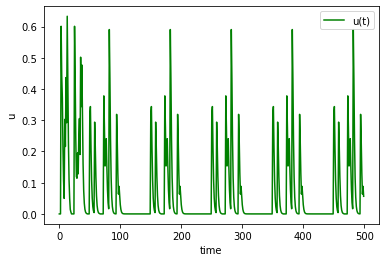

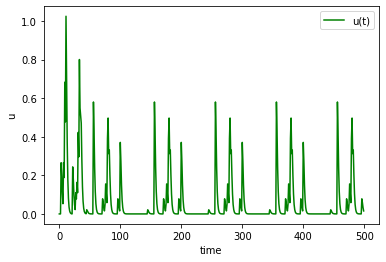

In [8]:
lam = 25
input_neurons = 30
hidden_neurons_1 = 20
hidden_neurons_2 = 10
output_neurons = 2
max_synapses = 5
max_delay = 7

T = 100
input_pattern = np.zeros((T, input_neurons))
for i in range(input_neurons):
  j = -1
  while j < T:
    j += np.random.poisson(lam, 1)
    if j >= T:
      break
    input_pattern[j, i] = 1

model_1 = SNN(input_neurons, hidden_neurons_1, hidden_neurons_2, output_neurons, max_synapses, max_delay)
epoch_cnt = 5
for epoch in range(epoch_cnt):
  for tt in range(T):
    model_1.apply(input_pattern[tt], epoch * T + tt)

model_1.visualize_u(T * epoch_cnt, text="")